# Book Recommender
Explicado paso a paso

## Paso 1
* Descargamos el Dataset
* Nos quedará guardado como un csv, en la direccion "**path**"


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download('dylanjcastillo/7k-books-with-metadata')

print('Path to dataset files: ', path)

100%|██████████| 1.47M/1.47M [00:00<00:00, 1.68MB/s]

Extracting files...
Path to dataset files:  C:\Users\lili1\.cache\kagglehub\datasets\dylanjcastillo\7k-books-with-metadata\versions\3


## Paso 2
* Importamos **pandas**
* Guardamos el dataset en la variable **books**
* En la última linea, mostramos el head del dataset

In [8]:
import pandas as pd  
books = pd.read_csv(path + '/books.csv')
books.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


## Paso 3
* Importamos seaborn y pyplot
* Definimos el heatmap con seaborn

In [9]:
import seaborn as sns 
import matplotlib.pyplot as plt

Text(50.58159722222221, 0.5, 'Rows')

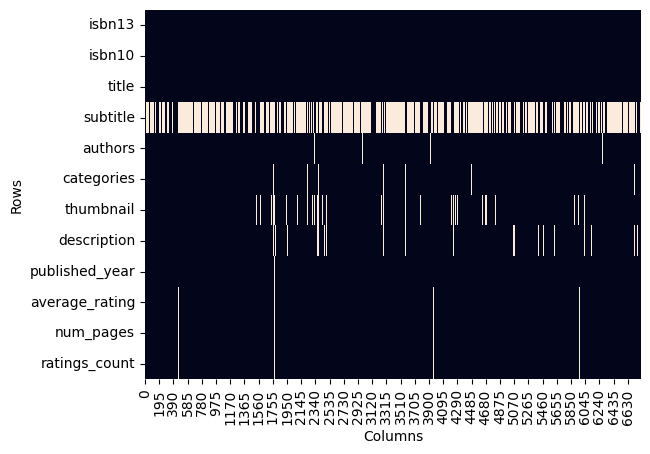

In [10]:
ax = plt.axes()

# Parametros: data (rectangular dataset), cbar (dibujar colorbar), ax (matplotlib axes)
# data es el unico parametro no-opcional
sns.heatmap(books.isna().transpose(), cbar=False, ax=ax)

plt.xlabel('Columns')
plt.ylabel('Missing Values')

## Paso 4
* Podemos intuir que los libros sin descripción podrían ser muy viejos o de bajo interés
* Entonces, buscamos la antiguedad de estos libros y sus datos

In [11]:
import numpy as np
books["missing_description"] = np.where(books["description"].isna(),1,0)
books["age_of_book"] = 2024 - books["published_year"]

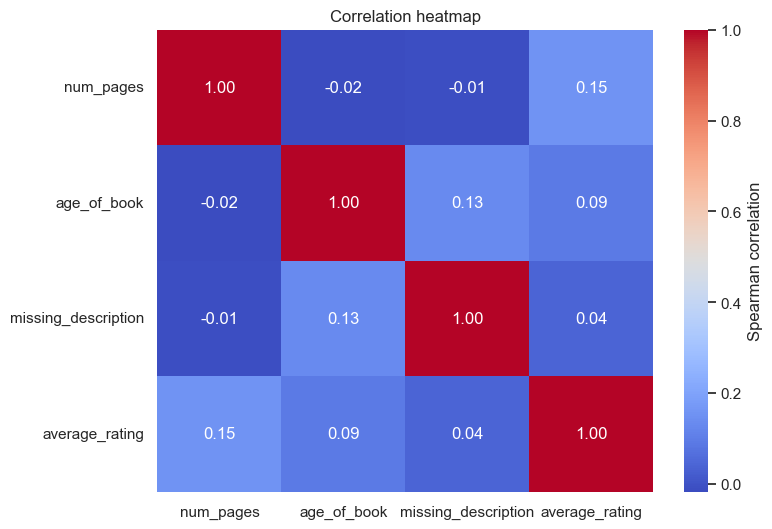

In [16]:
# Listamos las columnas que nos interesan en este análisis
columns_of_interest = ["num_pages","age_of_book","missing_description","average_rating"]

# Como el "missing_description" es un campo binario, 'spearman' es el metodo más adecuado para calcular la correlación
# Spearman sirve en general para campos discretos
correlation_matrix = books[columns_of_interest].corr(method='spearman')

sns.set_theme(style='white')
plt.figure(figsize=(8,6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"label": "Spearman correlation"})
heatmap.set_title('Correlation heatmap')
plt.show()

## Paso 5
* No encontramos buenos patrones referentes al missing_description
* Veremos cuantos libros tienen datos perdidos

In [18]:
books[(books["description"].isna()) |
       (books["num_pages"].isna()) | 
       (books["average_rating"].isna()) |
       (books["published_year"].isna())]

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
37,9780006906018,000690601X,The Princess of the Chalet School,NaN,Elinor Mary Brent-Dyer,Juvenile Fiction,http://books.google.com/books/content?id=EJcQP...,NaN,2000.0,4.10,159.0,446.0,1,24.0
60,9780007127740,000712774X,The illustrated man,NaN,Ray Bradbury,Fiction,http://books.google.com/books/content?id=kePql...,NaN,2002.0,4.14,186.0,56781.0,1,22.0
99,9780020442806,0020442807,"The Chronicles of Narnia: Lion, the witch and ...",NaN,Clive Staples Lewis,Fairy tales,NaN,NaN,1978.0,4.26,1425.0,1446.0,1,46.0
102,9780023513206,0023513209,Reason in History,A General Introduction to the Philosophy of Hi...,Georg Wilhelm Friedrich Hegel,Philosophy,http://books.google.com/books/content?id=BCvcY...,NaN,1953.0,3.64,95.0,430.0,1,71.0
105,9780026995016,0026995018,Spandau,The Secret Diaries,Albert Speer,History,NaN,NaN,1976.0,4.12,463.0,6.0,1,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6787,9783464371640,3464371646,About a Boy,NaN,Nick Hornby,NaN,http://books.google.com/books/content?id=PuDYw...,NaN,2002.0,3.80,256.0,155.0,1,22.0
6788,9783540292128,3540292128,Enzyme-Catalyzed Synthesis of Polymers,NaN,Shiro Kobayashi;Helmut Ritter;David Kaplan,Science,http://books.google.com/books/content?id=WXOym...,NaN,2006.0,0.00,254.0,0.0,1,18.0
6798,9787506435673,7506435675,Good Fight,NaN,Judd Winick;Matthew Clark,Juvenile Fiction,http://books.google.com/books/content?id=xGPZA...,Presents the adventures of a new group of hero...,2007.0,NaN,NaN,NaN,0,17.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0,1,31.0


## Paso 6
* El paso anterior muestra que tenemos 303 rows que cumplen alguna de las condiciones
* Esto es menos del 5% del dataset
* Al no ser un numero tan representativo, podemos dejarlos de lado.
* Lo que haremos será ahora buscar los libros que NO tengan nulos dichos campos.
* Guardamos este nuevo df en la variable **book_missing**

In [20]:
book_missing = books[(~books["description"].isna()) &
       (~books["num_pages"].isna()) & 
       (~books["average_rating"].isna()) &
       (~books["published_year"].isna())]

In [22]:
book_missing

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,20.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,24.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,42.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,31.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,22.0
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,21.0
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,25.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,0,43.0


## Paso 7
* Ahora, vamos a ver la distribución de categorías de este nuevo df.
* En este bloque, agrupamos por diferentes categorias y contamos en cuantos libros distintos se usan.

In [23]:
book_missing["categories"].value_counts().reset_index().sort_values("count",ascending=False)

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
280,Butlers,1
279,Gardens,1
278,Assassins,1
277,Married people,1
